In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
% matplotlib inline

In [2]:
# Reading the data as a Pandas Dataframe
yelp = pd.read_csv('C:/Users/vumamahe/yelp.csv')

In [3]:
yelp.shape

(10000, 10)

In [4]:
yelp.head()# Checking the first 5 rows

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()
# Observing if there is any missing values in the dataset. Fortunately, there's no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp['text length'] = yelp['text'].apply(len) # New column that contains the length of each message (Feature Extraction)

In [8]:
yelp.head()# Checking the first 5 rows with the new column added to the dataset

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Figure size 864x864 with 0 Axes>

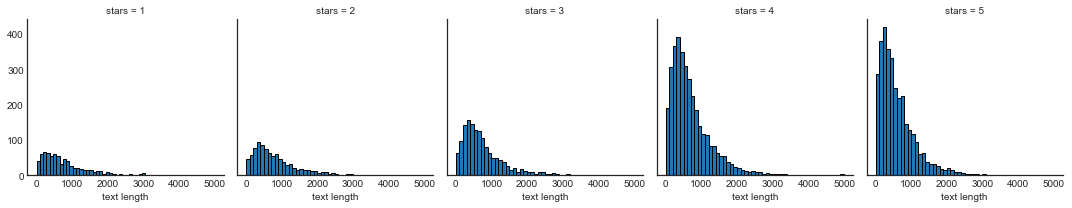

In [9]:
# Now we will visualize the variation of text length of review according to stars given to the review
sns.set_style('white')
plt.figure(figsize=(12,12))
Grid=sns.FacetGrid(yelp,col='stars')
Grid.map(plt.hist,'text length',edgecolor='black',bins=50)

#### OBSERVATION: You can see that text length for majority of data associated with these plots is between 0 and 1000.
#### As the no of stars increase the value of these outliers increase.
#### For ex: 1 star review outlier are between roughly 4000-4500 wherease for 5 stars review it is 5000.

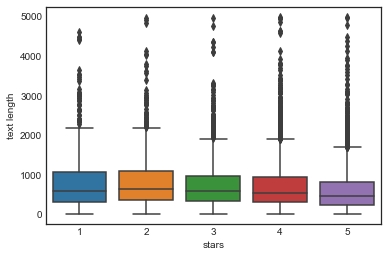

In [10]:
sns.boxplot(data=yelp,x='stars',y='text length')

##### OBSERVATION: As the no stars increase the median of text length decreases,however number of outliers increase

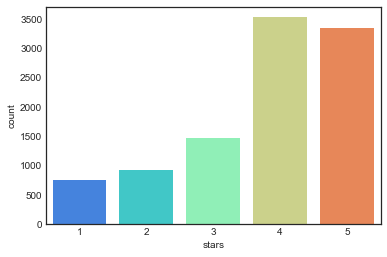

In [11]:
sns.countplot(data=yelp,x='stars', palette='rainbow')

#### The count of 4 stars reviews is maximum
#### If we groupby data frame according to the stars column 
#### which is a categorical column and take mean of all the other columns we get as follows

In [12]:
yelp_gr=yelp.groupby('stars').mean()
yelp_gr

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [13]:
#Correlation between the stars dataframe
yelp_gr.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


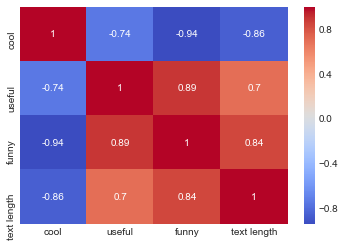

In [14]:
sns.heatmap(yelp_gr.corr(),cmap='coolwarm',annot=True)

##### From here we can see that the average text length decreases as the number of stars increases. Now let us do all the training and predictions and build a machine learning model. First we will create another data frame using the previous dataframe which will contain only 1 star and 5 star reviews as we have to classify either 1 star or 5 star

### NLP Classification Task

In [15]:
yelp_class=yelp[(yelp['stars']==5)|(yelp['stars']==1)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [16]:
yelp_class.shape

(4086, 11)

In [17]:
X=yelp_class['text'] #Feature
Y=yelp_class['stars'] #Target/label

In [18]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [19]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
nltk.download('stopwords')
print(text_process(X[0]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vumamahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [21]:
# Now we will create count vectorizer object.
# It will basically count the frequency of each word in every text review and create a sparse matrix

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
V=CountVectorizer(analyzer=text_process).fit(X)

In [24]:
len(V.vocabulary_)

26435

In [25]:
samplereview = X[24]

In [26]:
vector = V.transform([samplereview])
print (vector)
vector.shape

  (0, 2099)	1
  (0, 3006)	1
  (0, 8909)	1
  (0, 9151)	1
  (0, 9295)	1
  (0, 9616)	1
  (0, 9727)	1
  (0, 10847)	1
  (0, 11443)	3
  (0, 11492)	1
  (0, 11878)	1
  (0, 12221)	1
  (0, 13323)	1
  (0, 13520)	1
  (0, 14481)	1
  (0, 15165)	1
  (0, 16379)	1
  (0, 17812)	1
  (0, 17951)	1
  (0, 20044)	1
  (0, 20298)	1
  (0, 22077)	3
  (0, 24797)	1
  (0, 26102)	1


(1, 26435)

In [27]:
X = V.transform(X)

In [28]:
# Now we will split data into training set and test seta and train the data using a Naive Bayes Classifier

In [29]:
from sklearn.cross_validation import train_test_split

C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Predictions and Evaluations

In [33]:
predict=nb.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [35]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[157  71]
 [ 24 974]]
             precision    recall  f1-score   support

          1       0.87      0.69      0.77       228
          5       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226



In [36]:
print(accuracy_score(y_test,predict))


0.9225122349102773


### Using Text Processing - Import TfidfTransformer from sklearn.

In [37]:
from sklearn.feature_extraction.text import  TfidfTransformer

#### Import Pipeline from sklearn.

In [38]:
from sklearn.pipeline import Pipeline

#### Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()

In [39]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

#### Train Test Split
#### Redo the train test split on the yelp_class object.

In [40]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

#### Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels

In [41]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

#### Predictions and Evaluation
Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.

In [42]:
predictions = pipeline.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\vumamahe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
print(accuracy_score(y_test,predictions))

0.8140293637846656
